In [1]:
from classiq import *
from classiq.qmod.symbolic import logical_or
from classiq.execution import ExecutionPreferences

In [2]:
size = 4 # Number of qubits to represent the vertices (log2 of 16 nodes)
num_nodes = 2**size # Total number of nodes (16 nodes)

In [6]:
# to prepare a qubit in the |-> state
@qfunc
def prepare_minus(x: QBit):
    X(x)
    H(x)

# to implement a diffuser oracle for Grover's algorithm
@qfunc
def diffuzer_oracle(aux: Output[QNum],x:QNum):
    aux^=(x!=0)

# to implement zero diffuser
@qfunc
def zero_diffuzer(x: QNum):
    aux = QNum('aux')
    allocate(1,aux)
    within_apply(compute=lambda: prepare_minus(aux),
                action=lambda: diffuzer_oracle)


# to define coin operator
def coin_iteration(i:int,vertices: QNum, adjacent_vertices:QNum):
    prob = [0]*num_nodes  # initialize probability vector for 16 nodes
    if i == 0:
        prob[i + 1] = 1.0  # from 1st to right node (node 1)
    elif i == num_nodes - 1:
        prob[i - 1] = 1.0  # from last to left node (node 14)
    else:
        prob[i - 1] = 0.5  # left node
        prob[i + 1] = 0.5  # right node
    print(f'Node={i}, prob vec ={prob}')
    control(ctrl=vertices==i,
            operand=lambda: within_apply(
                compute= lambda: inplace_prepare_state(probabilities=prob, bound=0.01, target=adjacent_vertices),
                action= lambda: zero_diffuzer(adjacent_vertices)))



# to apply coin operator to all vertices
@qfunc 
def coin_operator(vertices:QNum, adjacent_vertices: QNum):
    for i in range(num_nodes):
        coin_iteration(i,vertices,adjacent_vertices)

In [7]:
# check adjacent vertices
@qfunc
def edge_oracle(res:Output[QBit], vertices: QNum, adjacent_vertices: QNum):
    res |= (((vertices - adjacent_vertices) == 1) | ((vertices - adjacent_vertices) == -1))




# swap the values of two QArrays
@qfunc 
def bitwise_swap(x: QArray[QBit], y:QArray[QBit]):
    repeat(count= x.len,
            iteration= lambda i: SWAP(x[i],y[i])) 




# shift operator to swap vertices with their adjacent vertices
@qfunc 
def shift_operator(vertices:QNum, adjacent_vertices: QNum):
    res = QNum('res')
    edge_oracle(res,vertices,adjacent_vertices)
    control(ctrl= res==1,
        operand= lambda: bitwise_swap(vertices,adjacent_vertices))

In [8]:
@qfunc 
def main(vertices:Output[QNum], adjacent_vertices:Output[QNum]):
    
    # Allocate qubits for vertices
    allocate(size, vertices)  
    
    # Apply Hadamard transform to initialize superposition
    hadamard_transform(vertices)
    
    # Allocate qubits for adjacent vertices
    allocate(size, adjacent_vertices)  
    
    coin_operator(vertices, adjacent_vertices)
    shift_operator(vertices, adjacent_vertices)



qmod = create_model(main)
qprog = synthesize(qmod)
show(qprog)

Node=0, prob vec =[0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Node=1, prob vec =[0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Node=2, prob vec =[0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Node=3, prob vec =[0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Node=4, prob vec =[0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Node=5, prob vec =[0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Node=6, prob vec =[0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0]
Node=7, prob vec =[0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0]
Node=8, prob vec =[0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0]
Node=9, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0]
Node=10, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0]
Node=11, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0]
Node=12, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0]
Node=13, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0]
Node

## Picture of the full circuit:

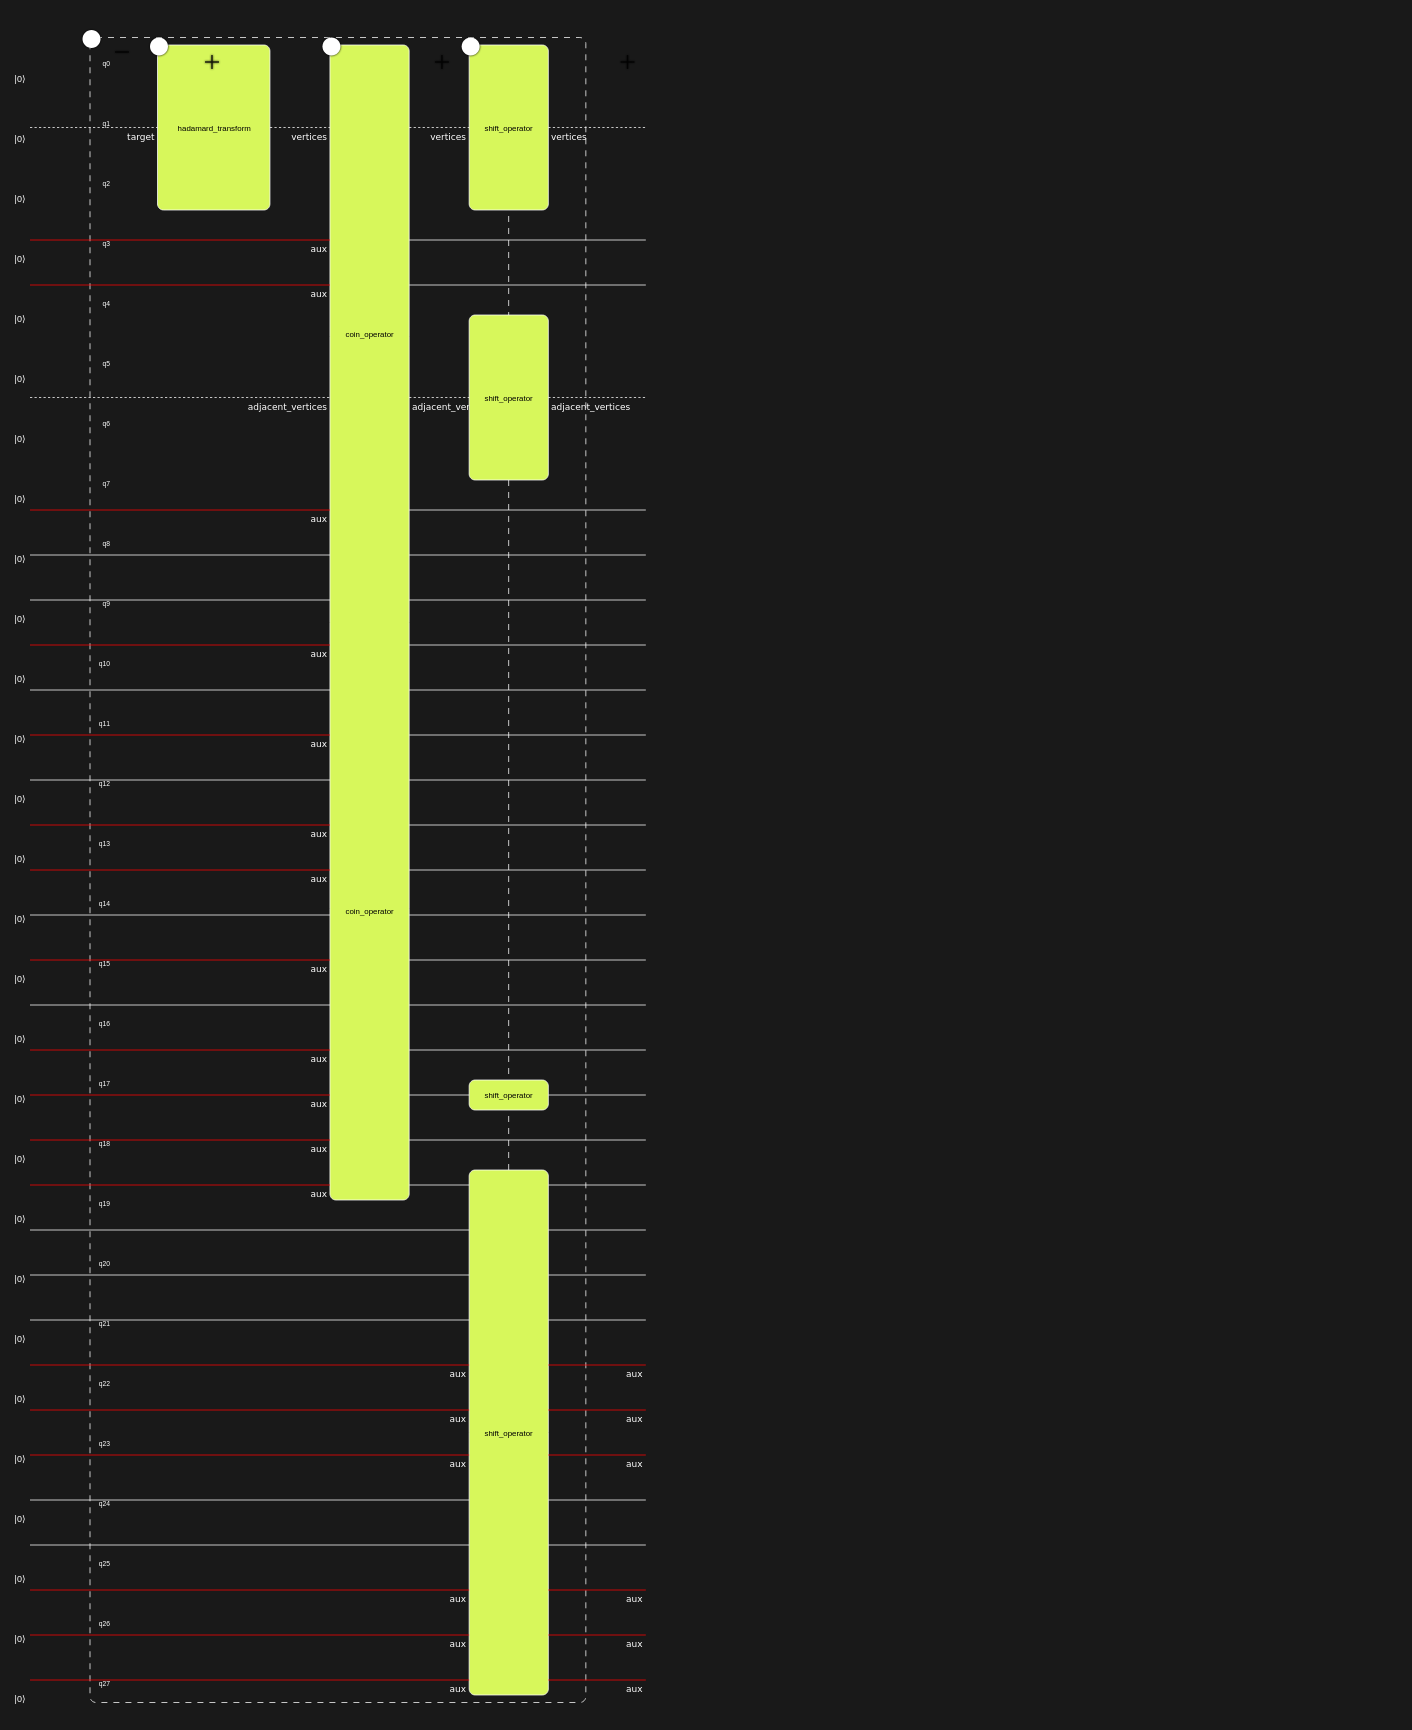

## Coin operator:

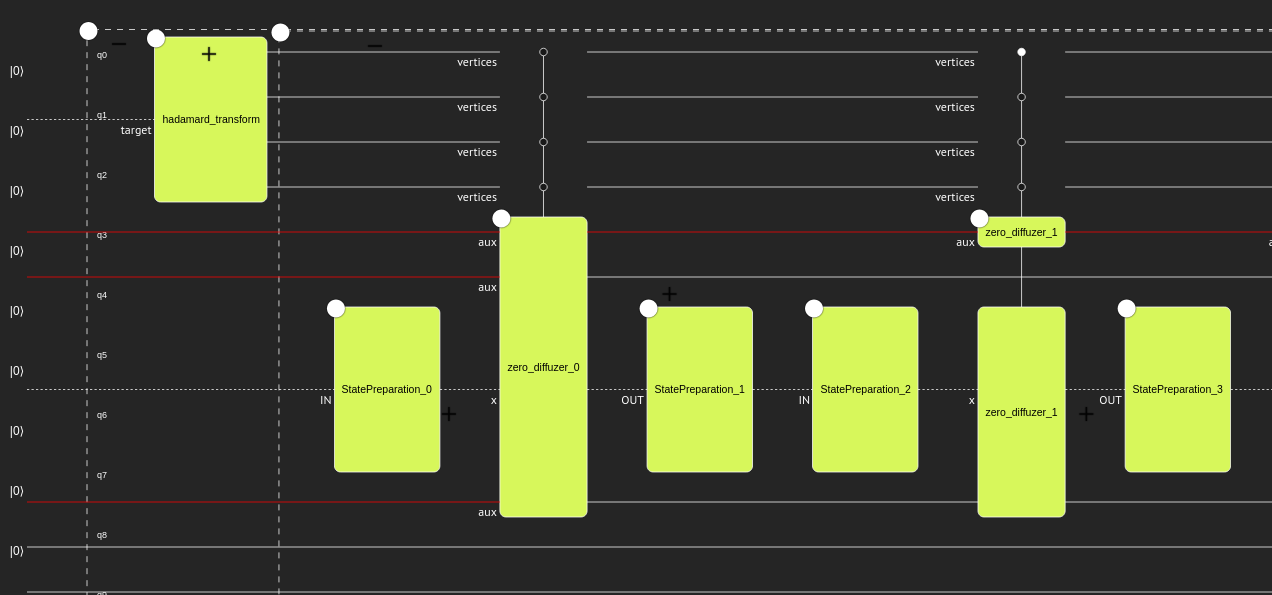

## Shift opertaor:

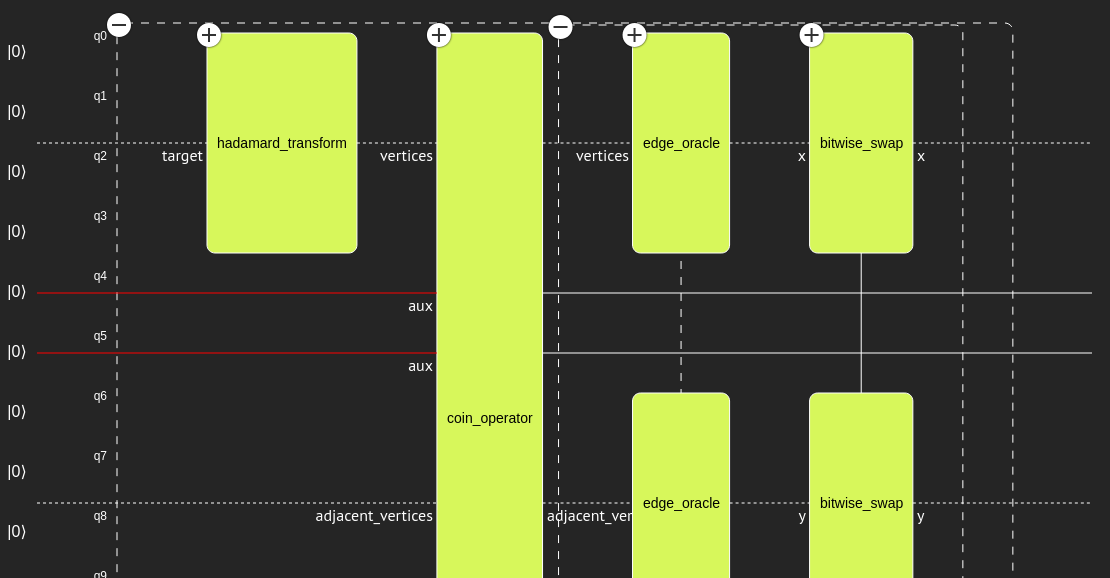